# What is this notebook all about?
In order to demonstrate my proficiency in Python, CV, and Deep Learning, I downloaded a paper with the title of [Automatic Traffic Sign Recognition Artificial Inteligence - Deep Learning Algorithm][1]. I implemented it using two notable libraries of `imgaug`, which was used in the paper, and `tf` for creating and training the proposed model.

In each section I will provide necessary information.

[1]: https://ieeexplore.ieee.org/document/9223186

### 1) Donwloading the **GTSRB** dataset
I downloaded the GTSRB dataset from kaggle using [this][1] link. The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011.

[1]: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

#### 1.1) Downloading directly from kaggle

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

100%|██████████| 612M/612M [00:06<00:00, 98.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [18]:
%cd "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1"
!ls

/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1
meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


#### 1.2) Or downloading/uploading to your Google Drive and access it from there

In [6]:
# Accessing Google Drive through Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Setting up the correct directory to work with
import os

gd_path = '/content/drive/MyDrive'
full_dir = os.path.join(gd_path + '/gtsrb')

if not os.path.exists(full_dir):
  os.mkdir(full_dir)

In [8]:
# Changing the root directory
%cd '/content/drive/MyDrive'
!ls

/content/drive/MyDrive
 04.zip				  Enpass		     Untitled1.png
 4_6017261345043382545.txt.gdoc  'Google Photos'	     Untitled2.png
 ad				  gtsrb			    'Untitled document.gdoc'
 app_lab.docx			  IMG_9894.HEIC		     Untitled.png
 archive.zip			  nifti			     uok-sec.gdoc
 BombTrader2			  Pictures		     weights
 chromedriver			 'Python Course'	    'What is Linux.docx'
 Churn_Modelling.gsheet		  rsna			    'اصلاحات فناوری اطلاعات.gsheet'
'Colab Notebooks'		 'SDN book'		     بورس.gdoc
 dicom				  Senders		    'درس هایی که از بورس میگیرم.gdoc'
 ecg				 'Shared Google Docs.gdoc'   东兆产品-XL版.xls


In [ ]:
# Unzipping the dataset and extracting it to the `gtsrb` directory
!unzip 'archive.zip' -d 'gtsrb'

### 2) Presenting some random images from the dataset

In [11]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

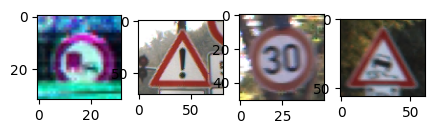

In [14]:
# Showing 4 random images
images_dir = os.path.join(full_dir, 'Train')
images_filenames = glob.glob(images_dir + '/*/*.png')

plt.figure(figsize=(5, 5))
plt.tight_layout()

for idx in range(0, 4):
  plt.subplot(1, 4, idx + 1)
  rnd = np.random.randint(1, len(images_filenames) + 1)
  filename = images_filenames[rnd]
  img = plt.imread(filename)
  plt.imshow(img)

### 3) Image Enhancement proposed inside the paper

As shown in the image below, the distribution of the images is inbalanced, hence a comprehensive data augmentation is necessary.

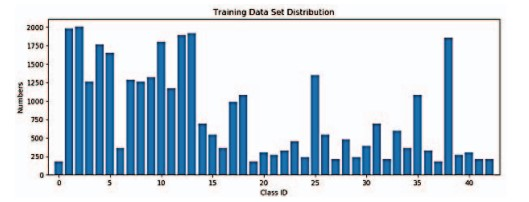

We use the `imgaug` library used in the paper itself.

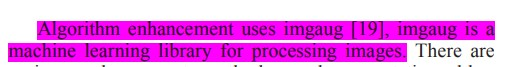

In [66]:
import imgaug.augmenters as iaa

import warnings
warnings.filterwarnings("ignore")

The enhancement algorithm is as follows:

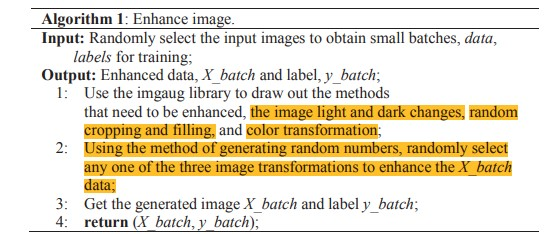

Here is the list of functions necessary to augment the dataset:

In [15]:
# Functions needed to augment the data

def fix_rescaling(images):
  return np.array([(np.array((img - np.min(img)) / (np.max(img) - np.min(img))))
                  for img in images])

def list_of_dirs(directory):
  return [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

def image_augmentation(images):
  rnd_selection = np.random.randint(1, 4)
  if rnd_selection == 1:
    aug = iaa.Sequential([iaa.Multiply((0.8, 1.2))])
  elif rnd_selection == 2:
    aug = iaa.Sequential([
        iaa.Crop(px=(0, 10), keep_size=False),
        iaa.Cutout(fill_mode='constant', cval=(0, 255),
                  fill_per_channel=0.5),
        ])
  else:
    aug = iaa.Sequential([
        iaa.AddToBrightness((-30, 30)),
        iaa.AddToHue((-50, 50))
        ])

  return aug(images=images)

In this section we generate new augmented images and saving them in their corresponding directories.

In [118]:
# Augmenting the dataset

directories = list_of_dirs(images_dir)

for dir in directories:
  images_filenames = glob.glob(images_dir + f'/{dir}/*.png')
  images = [plt.imread(img_filename) for img_filename in images_filenames]
  images = [(image * 255).astype(np.uint8) for image in images if image.dtype == np.float32]
  aug_images = image_augmentation(images)
  print(f'Starting "{dir}": ', end='')
  for idx, aug_img in enumerate(aug_images):
    aug_img = fix_rescaling(aug_img)
    filename = f'{images_dir}/{dir}/img_{idx}.png'
    if not os.path.exists(filename):
      plt.imsave(filename, aug_img)
    if idx % 40 == 0:
      print('.', end='')
  print(f'\n"{dir}" Finished!')

Starting "0": ......
"0" Finished!
Starting "1": ........................................................
"1" Finished!
Starting "10": ...................................................
"10" Finished!
Starting "11": .................................
"11" Finished!
Starting "12": .....................................................
"12" Finished!
Starting "13": ......................................................
"13" Finished!
Starting "14": ....................
"14" Finished!
Starting "15": ................
"15" Finished!
Starting "16": ...........
"16" Finished!
Starting "17": ............................
"17" Finished!
Starting "18": ..............................
"18" Finished!
Starting "19": ......
"19" Finished!
Starting "2": .........................................................
"2" Finished!
Starting "20": .........
"20" Finished!
Starting "21": .........
"21" Finished!
Starting "22": ..........
"22" Finished!
Starting "23": .............
"23" Finished!
Starting "24": ..

### 4) Preparing (transforming) the dataset so we can use it to train the network.

In [16]:
# Importing necessary libraries
import pandas as pd
from PIL import Image

In [120]:
classes = len(list_of_dirs(images_dir))
data_list = []
labels_list = []

for i in range(classes):
  i_path = os.path.join(images_dir, str(i))
  for img in os.listdir(i_path):
    im = Image.open(i_path + '/' + img)
    im = im.convert('RGB')
    im = im.resize((32, 32))
    data_list.append(im)
    labels_list.append(i)

In [124]:
# Converting to `ndarray` and save the dataset
data = np.array(data_list)
labels = np.array(labels_list)

np.save(os.path.join(images_dir, 'data.npy'), data)
np.save(os.path.join(images_dir, 'labels.npy'), labels)

In [20]:
data = np.load(os.path.join(images_dir, 'data.npy'))
labels = np.load(os.path.join(images_dir, 'labels.npy'))

### 5) Defining and training the model

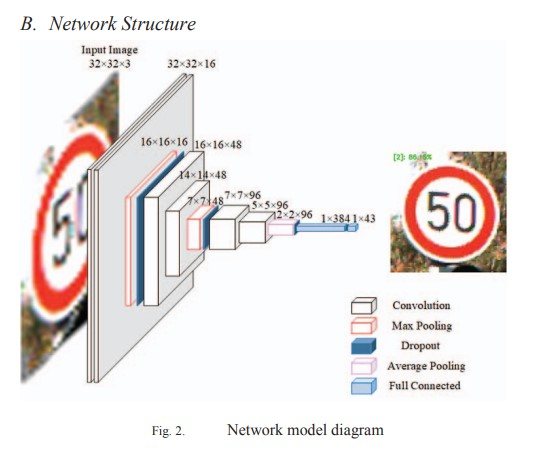

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  X_prep = X.astype('float32')
  X_prep /= 255.0
  y_prep = to_categorical(np.array(y))
  return (X_prep, y_prep)

In [22]:
X, y = preprocess_data(data, labels)

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, shuffle=True)

In [24]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=3, activation='elu', padding='same', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=48, kernel_size=3, activation='elu', padding='same'))
model.add(layers.Conv2D(filters=48, kernel_size=3, activation='elu', padding='valid'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=96, kernel_size=3, activation='elu', padding='same'))
model.add(layers.Conv2D(filters=96, kernel_size=3, activation='elu', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(384, activation='elu'))
model.add(layers.Dense(43, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 48)          │           6,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 48)          │          20,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 96)            │          41,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 96)            │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 2, 2, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 384)                 │         147,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          16,555 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,195 (1.21 MB)

 Trainable params: 317,195 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5515 - loss: 1.5962 - val_accuracy: 0.9262 - val_loss: 0.2440
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8905 - loss: 0.3473 - val_accuracy: 0.9505 - val_loss: 0.1592
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9292 - loss: 0.2201 - val_accuracy: 0.9607 - val_loss: 0.1206
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9407 - loss: 0.1828 - val_accuracy: 0.9685 - val_loss: 0.1019
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9509 - loss: 0.1546 - val_accuracy: 0.9697 - val_loss: 0.0908
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9561 - loss: 0.1363 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9580 - loss: 0.1338 - val_accuracy: 0.9778 - val_loss: 0.0775
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9638 - loss: 0.1154 - val_accuracy: 

### 6) Checking the results and comparing it to the paper results

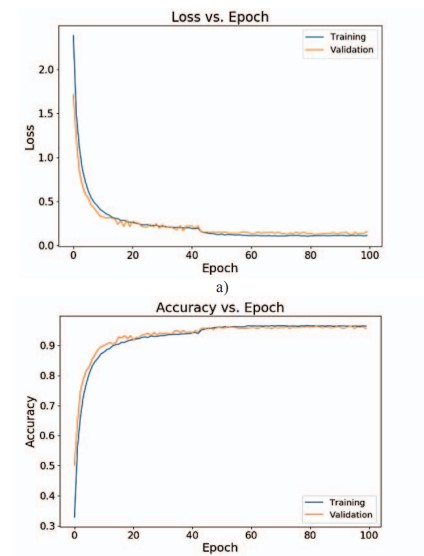

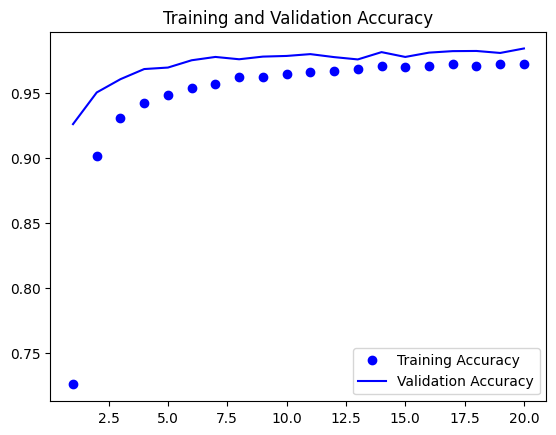

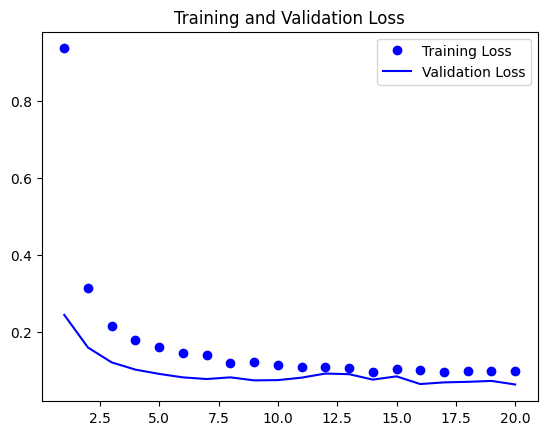

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()